#### 데이터 명세
- h12_g3 : 성별(1 : 남자, 2 : 여자, 9 : 모름/무응답)
- h12_g4 : 태어난 년도(1900 ~ 2014, 9999 : 모름/무응답)
- h12_g10 : 혼인상태(0 : 미해당, 1 : 유배우, 2 : 사별, 3 : 이혼, 4 : 별거, 5 : 미혼(18세 이상, 미혼모 포함), 6 : 기타, 9 : 모름/무응답
- h12_g11 : 종교(1 : 있음, 2 : 없음, 9 : 모름/무응답)
- h12_eco9 : 직종(직종코드표, 9999 : 모름/무응답)
- p1202_8aq1 : 일을 한 달의 월 평균 임금(1 ~ 9998, 만원 단위, 9999 : 모름/무응답)
- h12_reg7 : 7개 권역별 지역 부분(1 : 서울, 2 : 수도권(인천/경기), 3 : 부산/경남/울산, 4 : 대구/경북, 5 : 대전/충남, 6 : 강원/충북, 7 : 광주/전남/전북/제주도

#### 분석할 내용
- 조사 대상에서 남녀 성별 비를 파악한다.
- 성별에 따른 평균 월급 차이 분석
- 나이에 따른 평균 임금의 변화
- 종교 유무에 따른 이혼비율

In [62]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 12                  # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 
import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
# sheet_name : 생략하면 첫번째 시트가 지정, 시트의 이름이나 0부터 시작하는 
# 인덱스를 셋팅해 시트를 선택할 수 있다.
df = pd.read_excel('../dataset/dataset2017.xlsx', sheet_name='Sheet1')
df

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [12]:
# df['h12_g3 ','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']
df1 = df[['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']]
df1.columns=['성별','태어난 년도','혼인상태','종교','직종','월평균임금','지역']

In [13]:
df1

,성별,태어난 년도,혼인상태,종교,직종,월평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


### 조사 대상에서 남녀 성별 비를 파악한다.
- 1:남자, 2:여자, 9:무응답

In [14]:
# 남자 인원수
man = df1[df1['성별'] == 1]
man_count = df1[df1['성별'] == 1]['성별'].count()

# 여자 인원수
woman = df1[df1['성별'] == 2]
woman_count = df1[df1['성별'] == 2]['성별'].count()

# 무응답 수
count = df1[df1['성별'] == 9]['성별'].count()

In [15]:
man_count + woman_count

15422

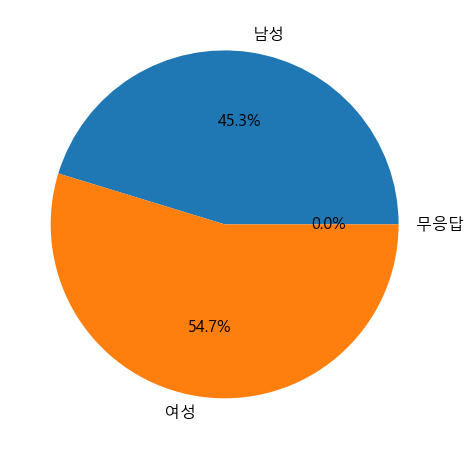

In [16]:
ratio =[man_count, woman_count, count]
labels = ['남성','여성','무응답']

plt.figure(figsize=[10,8])
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 성별에 따른 평균 월급 차이 분석

In [17]:
df1.isna().sum()

성별            0
태어난 년도        0
혼인상태          0
종교            0
직종         8291
월평균임금     10915
지역            0
dtype: int64

In [18]:
# 월평균임금 결측치 제거

man_salary = man.dropna(subset=['월평균임금'])
woman_salary = woman.dropna(subset=['월평균임금'])

In [29]:
# 성별 월급

man_salary_mean = round(man_salary['월평균임금'].mean(),2)
woman_salary_mean = round(woman_salary['월평균임금'].mean(),2)

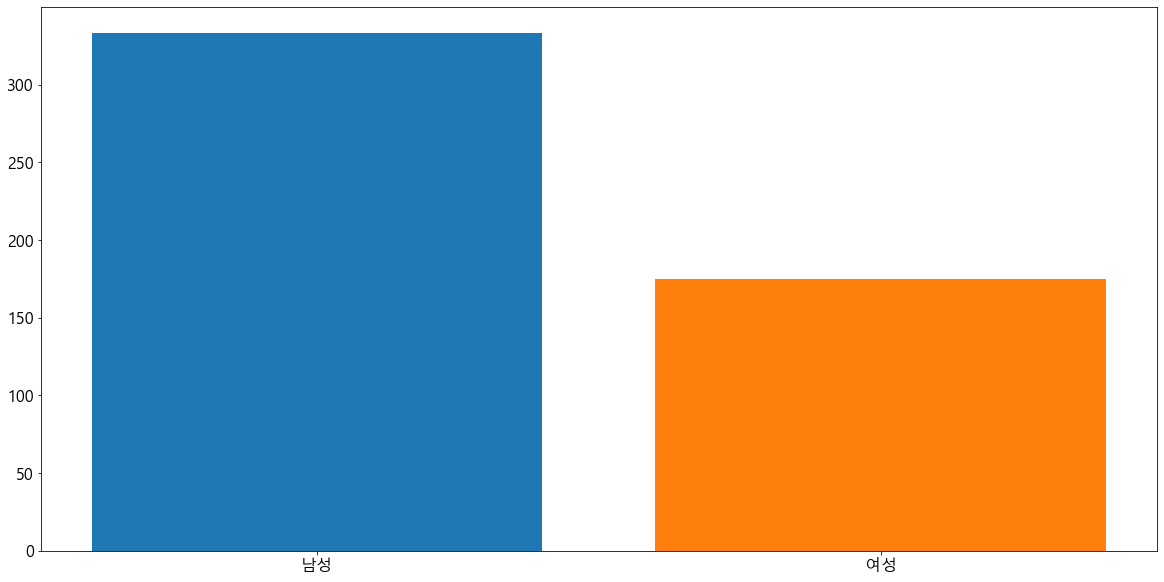

In [31]:
# 시각화

label = ['남성','여성']

plt.bar(label[0],man_salary_mean)
plt.bar(label[1],woman_salary_mean)

plt.show()

In [34]:
round(man_salary_mean - woman_salary_mean,2)

157.99

### 종교 유무에 따른 이혼비율

In [43]:
# 결측치 확인
df1['종교'].isna().sum()

0

In [44]:
df1['혼인상태'].isna().sum()

0

In [41]:
# 종교 유무 나누기
religion = df1[df1['종교']==1]
no_religion = df1[df1['종교']==2]

In [68]:
religion_ = religion['혼인상태'].count()
religion_3 = religion[religion['혼인상태']==3]['혼인상태'].count()

print(religion_)
print(religion_3)

7300
315


In [65]:
no_religion_ = no_religion['혼인상태'].count()
no_religion_3 = no_religion[no_religion['혼인상태']==3]['혼인상태'].count()
print(no_religion_)
print(no_religion_3)

8122
382


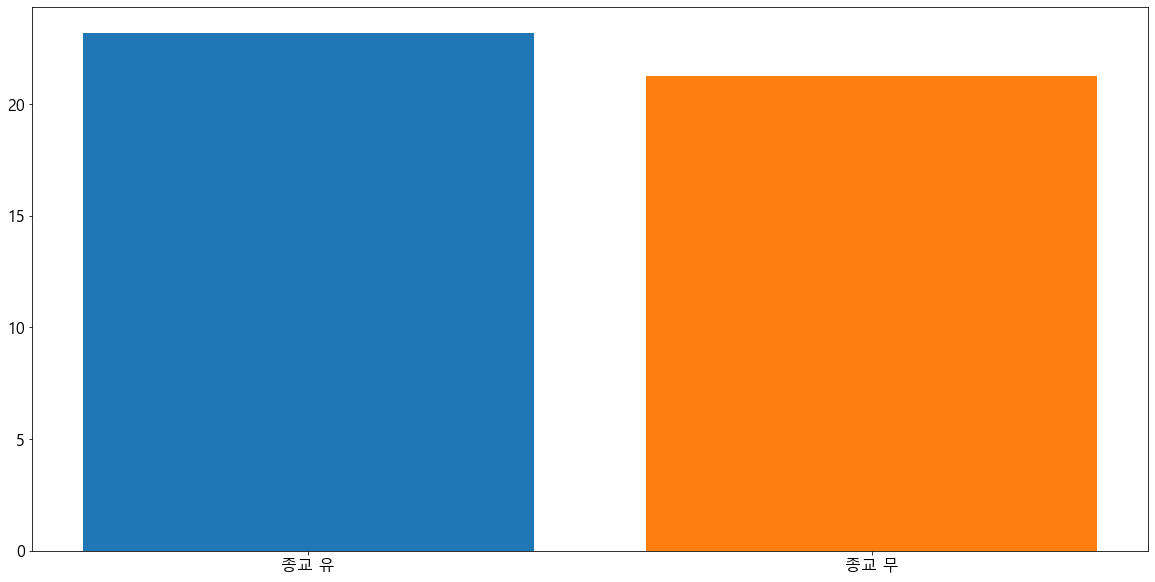

In [70]:
label = ['종교 유','종교 무']

plt.bar(label[0],religion_/religion_3)
plt.bar(label[1],no_religion_/no_religion_3)

plt.show()

# 강사님 풀이

### 필요한 컬럼만 추출

In [81]:
columns_list = ['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']
df_all = df[columns_list]
a1 = ['성별','출생년도','혼인상태','종교유무','직종','평균임금','지역']
df_all.columns=a1
df_all.head()


,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


### 데이터 프레임 확인

In [82]:
# 데이터 프레임 요약 정보
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      15422 non-null  int64  
 1   출생년도    15422 non-null  int64  
 2   혼인상태    15422 non-null  int64  
 3   종교유무    15422 non-null  int64  
 4   직종      7131 non-null   float64
 5   평균임금    4507 non-null   float64
 6   지역      15422 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 843.5 KB


- 로우는 15422개
- 컬럼은 7개
- 문자열(Object)컬럼은 존재하지 않는다.

### 결측치 확인
- isna() -> 결측치 부분은 True

In [83]:
df_all.isna().sum()

성별          0
출생년도        0
혼인상태        0
종교유무        0
직종       8291
평균임금    10915
지역          0
dtype: int64

### 이상치 확인 

#### 범위형 데이터 (수치형 자료)
- 출생년도, 평균임금

In [84]:
df_all[['출생년도','평균임금']].describe()

,출생년도,평균임금
count,15422.000000,4507.000000
mean,1968.436195,257.950073
std,24.321489,192.706107
min,1907.000000,0.000000
25%,1947.000000,135.000000
50%,1967.000000,208.000000
75%,1989.000000,336.000000
max,2016.000000,1874.000000


- 출생년도에 2014를 초과하는 이상치가 존재,
- 평금임금에 0이라는 이상치가 존재.

#### 레이블형 데이터

In [85]:
# 레이블형 데이터의 이상치
a1 = df_all['성별'].value_counts()
a2 = df_all['혼인상태'].value_counts()
a3 = df_all['종교유무'].value_counts()
a4 = df_all['직종'].value_counts()
a5 = df_all['지역'].value_counts()

display(a1)
display(a2)
display(a3)
display(a4)
display(a5)

2    8440
1    6982
Name: 성별, dtype: int64

1    7763
0    2484
5    2352
2    2022
3     697
4      87
6      17
Name: 혼인상태, dtype: int64

2    8122
1    7300
Name: 종교유무, dtype: int64

611.0    1154
521.0     367
941.0     315
312.0     283
930.0     263
         ... 
212.0       2
620.0       1
871.0       1
872.0       1
283.0       1
Name: 직종, Length: 148, dtype: int64

2    3492
7    2749
3    2564
1    2208
4    1874
5    1355
6    1180
Name: 지역, dtype: int64

- 위의 레이블형 데이터에는 이상치가 존재하지 않는다.


### 극단치 확인

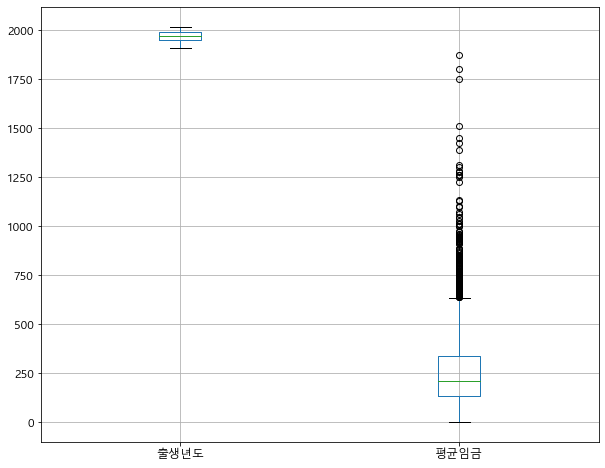

In [86]:
df_all[['출생년도','평균임금']].boxplot()
plt.show()

### 데이터 전처리

In [87]:
# 데이터 프레임 복제
df_copy = df_all.copy()
df_copy.head()

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


#### 성별

In [88]:
# 성별에 저장되어 있는 데이터를 확인
df_copy['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

In [89]:
# 컬럼 내의 값을 변경

map1 ={
    1 : '남자',
    2 : '여자',
    9 : '무응답'
}

df_copy['성별'] = df_copy['성별'].map(map1)
df_copy['성별'].value_counts()

여자    8440
남자    6982
Name: 성별, dtype: int64

#### 혼인상태

In [90]:
# 저장된 값의 종류 확인
df_copy['혼인상태'].value_counts()

1    7763
0    2484
5    2352
2    2022
3     697
4      87
6      17
Name: 혼인상태, dtype: int64

In [91]:
map2 = {
    0 : '미해당', 
    1 : '유배우',
    2 : '사별',
    3 : '이혼',
    4 : '별거', 
    5 : '미혼(18세 이상, 미혼모 포함)',
    6 : '기타', 
    9 : '모름/무응답'
}

df_copy['혼인상태'] = df_copy['혼인상태'].map(map2)
df_copy['혼인상태'].value_counts()

유배우                   7763
미해당                   2484
미혼(18세 이상, 미혼모 포함)    2352
사별                    2022
이혼                     697
별거                      87
기타                      17
Name: 혼인상태, dtype: int64

#### 종교유무

In [92]:
# 저장된 값의 종류 확인
df_copy['종교유무'].value_counts()

2    8122
1    7300
Name: 종교유무, dtype: int64

In [93]:
map3 ={
    1 : '있음', 
    2 : '없음',
    9 : '모름/무응답'
}

df_copy['종교유무'] = df_copy['종교유무'].map(map3)
df_copy['종교유무'].value_counts()

없음    8122
있음    7300
Name: 종교유무, dtype: int64

#### 지역

In [94]:
# 저장된 값의 종류 확인
df_copy['지역'].value_counts()

2    3492
7    2749
3    2564
1    2208
4    1874
5    1355
6    1180
Name: 지역, dtype: int64

In [95]:
map4 ={
    1 : '서울', 
    2 : '수도권(인천/경기)', 
    3 : '부산/경남/울산', 
    4 : '대구/경북', 
    5 : '대전/충남', 
    6 : '강원/충북', 
    7 : '광주/전남/전북/제주도'
}

df_copy['지역'] = df_copy['지역'].map(map4)
df_copy['지역'].value_counts()

수도권(인천/경기)      3492
광주/전남/전북/제주도    2749
부산/경남/울산        2564
서울              2208
대구/경북           1874
대전/충남           1355
강원/충북           1180
Name: 지역, dtype: int64

In [96]:
df_copy.head()

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,여자,1936,사별,없음,NaN,NaN,서울
1,여자,1945,사별,없음,NaN,NaN,서울
2,남자,1948,사별,없음,NaN,NaN,서울
3,남자,1942,이혼,있음,762.0,108.9,서울
4,여자,1923,사별,있음,NaN,NaN,서울


### 분석

#### 1. 조사 대상에서 남녀 성비를 파악한다.

In [39]:
a1 = df_copy['성별'].value_counts()
a1

여자    8440
남자    6982
Name: 성별, dtype: int64

In [46]:
# 시각화를 위한 데이터 프레임 준비
df_gender = pd.DataFrame(a1)
df_gender.columns = ['명']
df_gender

,명
여자,8440
남자,6982


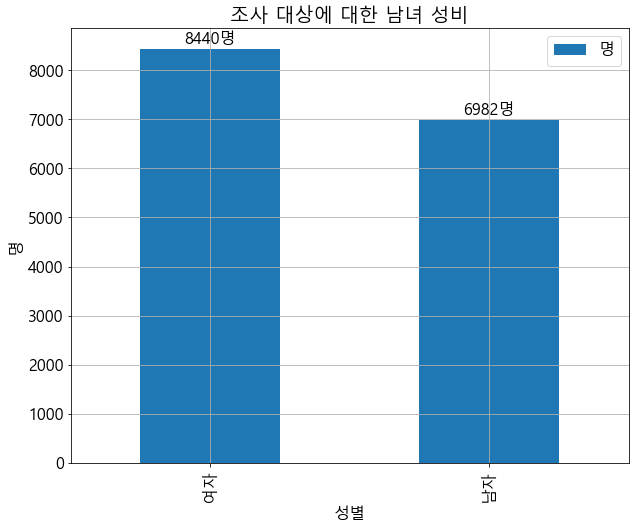

In [53]:
df_gender.plot.bar()

# 그래프 제목
plt.title('조사 대상에 대한 남녀 성비')

# 그리드
plt.grid()

# 축이름
plt.xlabel('성별')
plt.ylabel('명')

# 값표시
for idx, value in enumerate(df_gender['명']):
#     print(idx),
#     print(value)
    plt.text(idx, value+100, f'{value}명', horizontalalignment='center')
    

plt.show()

조사 대상은 여자가 8440명, 남자가 6982명

#### 2. 성별에 따른 평균 월급 차이 분석

In [54]:
# 성별과 평균 임금 데이터를 가져온다.
df_sal = df_copy[['성별', '평균임금']]
df_sal.head()

,성별,평균임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [56]:
# 결측치 제거
df_sal.dropna(inplace=True)
df_sal.isna().sum()

성별      0
평균임금    0
dtype: int64

In [57]:
# 성별을 기준으로 급여의 평균을 구한다.
df_sal_avg = df_sal.groupby('성별').mean()
df_sal_avg

,평균임금
성별,
남자,333.280785
여자,175.293108


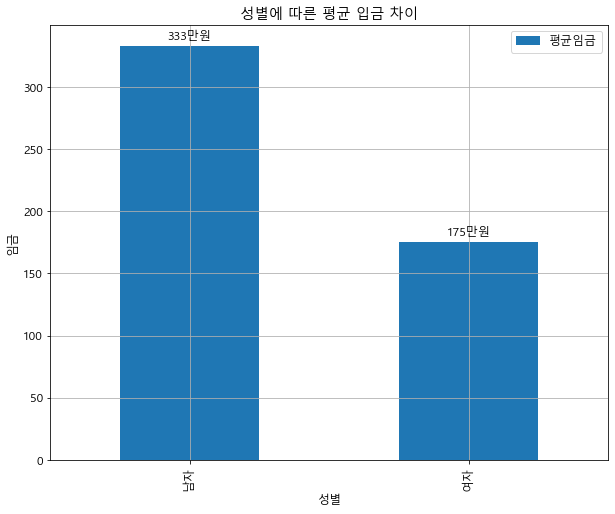

In [64]:
df_sal_avg.plot.bar()

# 그래프 제목
plt.title('성별에 따른 평균 입금 차이')

# 그리드
plt.grid()

# 축이름
plt.xlabel('성별')
plt.ylabel('임금')

# 값표시
for idx, value in enumerate(df_sal_avg['평균임금']):
#     print(idx),
#     print(value)
    plt.text(idx, value + 5, f'{int(value)}만원', horizontalalignment='center')
    

plt.show()

남자가 여자보다 평균 급여가 높다.

#### 3. 나이에 따른 평균 임금의 변화

In [97]:
df_tmp = df_copy[['출생년도','평균임금']]
df_tmp.head()

,출생년도,평균임금
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN


In [103]:
# 이상치 제거 (출생년도가 2015이상인 로우들의 인덱스)

tmp_idx = df_tmp.query('출생년도 >= 2015').index
df_tmp.drop(tmp_idx,inplace=True)

In [105]:
# 나이 구하기 (2017년도 자료)
df_tmp['나이'] = 2017 - df_tmp['출생년도']
df_tmp.head()

,출생년도,평균임금,나이
0,1936,NaN,81
1,1945,NaN,72
2,1948,NaN,69
3,1942,108.9,75
4,1923,NaN,94


In [106]:
# 출생년도 컬럼 제거
df_tmp.drop('출생년도',axis=1, inplace=True)
df_tmp.head()

,평균임금,나이
0,NaN,81
1,NaN,72
2,NaN,69
3,108.9,75
4,NaN,94


In [107]:
# 결측치 확인
df_tmp.isna().sum()

평균임금    10781
나이          0
dtype: int64

In [108]:
# 결측치 제거
df_tmp.dropna(inplace=True)

In [109]:
# 나이별 급여 평균을 구한다.
df_avg = df_tmp.groupby('나이').mean()
df_avg.head()

,평균임금
나이,
19,89.333333
20,136.720000
21,140.807692
22,138.000000
23,145.652000


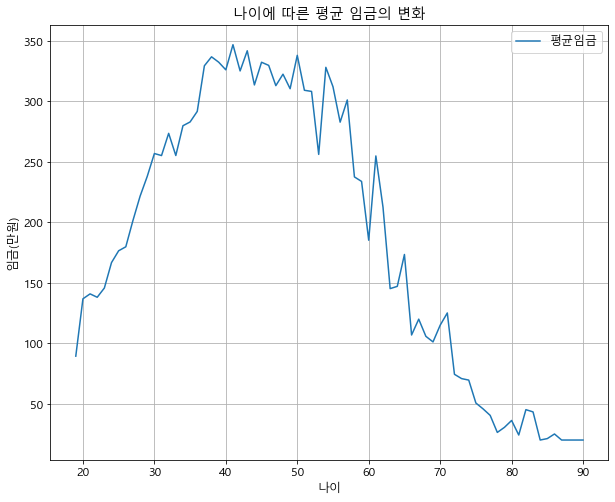

In [112]:
df_avg.plot()

# 그래프 제목
plt.title('나이에 따른 평균 임금의 변화')

# 그리드
plt.grid()

# 축이름
plt.xlabel('나이')
plt.ylabel('임금(만원)')

plt.show()

#### 4. 종교 유무에 따른 이혼비율

In [123]:
tmp_df2 = df_copy[['종교유무','혼인상태']]
tmp_df2.head()

,종교유무,혼인상태
0,없음,사별
1,없음,사별
2,없음,사별
3,있음,이혼
4,있음,사별


In [124]:
# 결측치 확인
tmp_df2.isna().sum()

종교유무    0
혼인상태    0
dtype: int64

In [126]:
# 미해당, 미혼을 제외한다.
idx2 = tmp_df2.query('혼인상태 == "미해당"').index
tmp_df2.drop(idx2, inplace=True)

idx2 = tmp_df2.query('혼인상태 == "미혼(18세 이상, 미혼모 포함)"').index
tmp_df2.drop(idx2, inplace=True)

idx2 = tmp_df2.query('혼인상태 == "기타"').index
tmp_df2.drop(idx2, inplace=True)

idx2 = tmp_df2.query('혼인상태 == "모름/무응답"').index
tmp_df2.drop(idx2, inplace=True)

tmp_df2['혼인상태'].value_counts()

유배우    7763
사별     2022
이혼      697
별거       87
Name: 혼인상태, dtype: int64

In [128]:
# 이혼한 사람들의 데이터
tmp_df200 = tmp_df2.query('혼인상태 == "이혼"')
tmp_df300 = tmp_df2.query('혼인상태 != "이혼"')

display(tmp_df200)
display(tmp_df300)


,종교유무,혼인상태
3,있음,이혼
11,있음,이혼
33,있음,이혼
47,없음,이혼
64,있음,이혼
...,...,...
15337,있음,이혼
15342,없음,이혼
15373,없음,이혼
15374,없음,이혼


,종교유무,혼인상태
0,없음,사별
1,없음,사별
2,없음,사별
4,있음,사별
5,있음,유배우
...,...,...
15413,있음,유배우
15414,없음,유배우
15415,없음,유배우
15416,있음,유배우


In [129]:
# 이혼한 사람들의 종교 유무를 파악한다.
a1 = tmp_df200.groupby('종교유무').count()
a1.columns = ['명']
a1


,명
종교유무,
없음,382
있음,315


In [130]:
# 이혼하지 않은 사람들의 종교 유무를 파악한다.
a2 = tmp_df300.groupby('종교유무').count()
a2.columns = ['명']
a2

,명
종교유무,
없음,4759
있음,5113


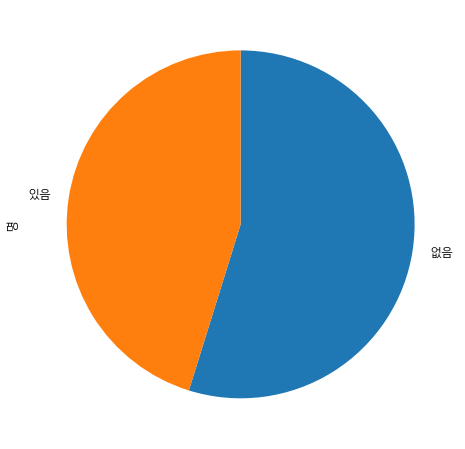

In [137]:
# 이혼한 사람들의 종교 유무 비율
a1['명'].plot.pie(startangle=90, counterclock=False)
plt.show()

In [138]:
df_all.to_csv('df_all.csv')